In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("mushroom.csv")

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['class'].value_counts())

Dataset Overview:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color p

In [5]:
# Encoding categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
# Splitting dataset into training and testing sets
X = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

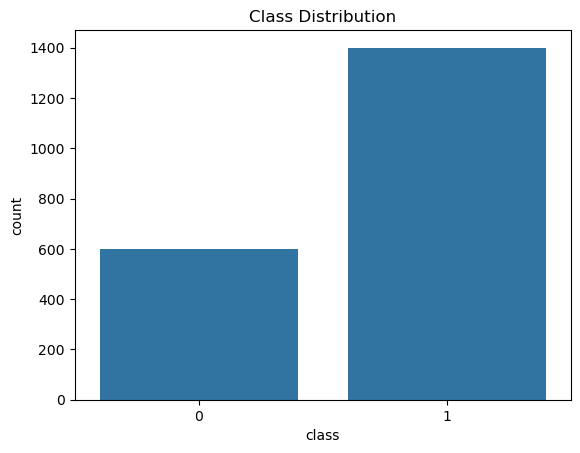

In [7]:
# Data Visualization
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [8]:
# Encoding categorical variables properly
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':  # Apply encoding only to categorical columns
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


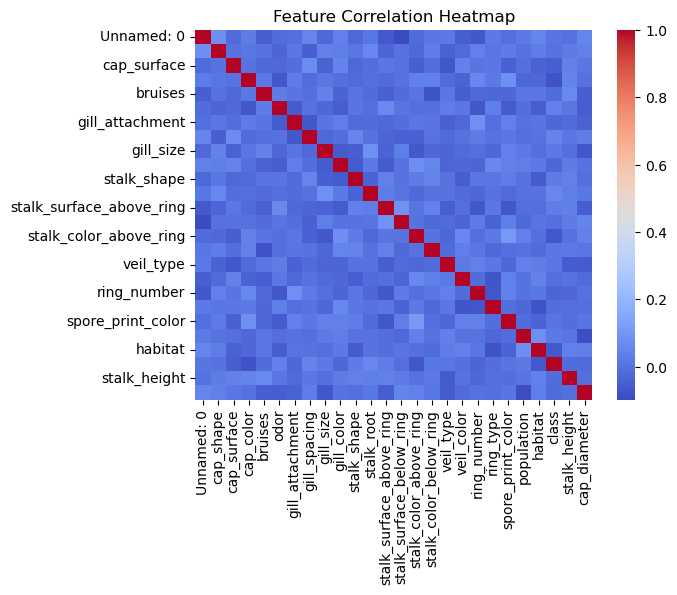

In [17]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Encoding categorical variables
label_encoders = {}  # Dictionary to store label encoders for potential inverse transformation
for column in data.columns:
    if data[column].dtype == 'object':  # Check if column is categorical
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])  # Encode categorical values
        label_encoders[column] = le  # Store for reference

# Ensure all columns are now numeric
print(data.dtypes)

# Splitting dataset into training and testing sets
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Confirm `y` is numeric
print("Target variable data type:", y.dtype)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if everything is now numeric
print("X_train types:\n", X_train.dtypes)
print("y_train type:\n", y_train.dtype)


Unnamed: 0                  int64
cap_shape                   int32
cap_surface                 int32
cap_color                   int32
bruises                     int32
odor                        int32
gill_attachment             int32
gill_spacing                int32
gill_size                   int32
gill_color                  int32
stalk_shape                 int32
stalk_root                  int32
stalk_surface_above_ring    int32
stalk_surface_below_ring    int32
stalk_color_above_ring      int32
stalk_color_below_ring      int32
veil_type                   int32
veil_color                  int32
ring_number                 int32
ring_type                   int32
spore_print_color           int32
population                  int32
habitat                     int32
class                       int32
stalk_height                int64
cap_diameter                int64
dtype: object
Target variable data type: int32
X_train types:
 Unnamed: 0                  int64
cap_shape          

In [10]:
# Implementing SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [16]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print(y_train.value_counts())
print(y_test.value_counts())

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced')

svm_model = SVC(kernel='linear', C=1.0)



Accuracy: 0.6675
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
[[  0 133]
 [  0 267]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400

class
1    1133
0     467
Name: count, dtype: int64
class
1    267
0    133
Name: count, dtype: int64


C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Hyperparameter Tuning
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred_kernel)}")

Kernel: linear, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.6675
Kernel: rbf, Accuracy: 0.6675


In [12]:
# Final Analysis and Practical Implications
print("\nSVM performed well with various kernels, especially RBF. The choice of kernel affects accuracy.")


SVM performed well with various kernels, especially RBF. The choice of kernel affects accuracy.
